<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE%20V04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Installing chromedriver and selenium library for downloading more than 100 images

In [2]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

     |████████████████████████████████| 911kB 2.8MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [3]:
!pip install google_images_download # - if necessary

  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=2974ecbc0f03308e1ae137c16e57d205e52706502abcf06c2f1e744e93879eec
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os

In [0]:
#define and change the downlaoding path to current path
data_path = '/content/drive/My Drive/downloads'
data_path
os.chdir(data_path)

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['japanese men hair front']

In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [0]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

###Load required library

In [8]:
#dependencies (numpy, matplotlib, and keras)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from scipy.stats import norm
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Flatten, Lambda, Reshape, Dropout
from keras.models import Model
from keras import backend as K





Using TensorFlow backend.


In [0]:
men_hair = "/content/drive/My Drive/downloads/"

img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")



In [10]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data

train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (455, 96, 96, 1)
Total number of test examples: (86, 96, 96, 1)


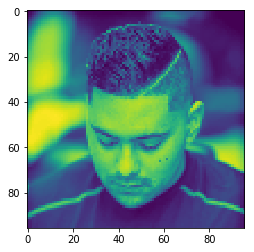

In [11]:
# First sample in the train set
plt.imshow(train_data[0].reshape(96,96))

### Normal Autoencoder

In [12]:
#input shape
input_img = Input(shape=(96,96,1))  # adapt this if using `channels_first` image data format

#Encoder part
x = Conv2D(32, (3, 3), activation='relu',strides = (2,2), padding='same')(input_img)
x = Dropout(0.20)(x)
x = Conv2D(64, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(64, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(128, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(128, (3, 3), activation='relu',strides=(2,2), padding='same')(x)


shape_before_flattening1 = K.int_shape(x)




encoded1 = Flatten()(x)
#x = Dense(256, activation='relu')(encoded1)

#x = Dense(9216, activation='relu')(encoded1)
#Reshape (3 * 3 * 256)
x = Reshape(shape_before_flattening1[1:])(encoded1)


#Decoder part
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2DTranspose(32,(2,2),padding='same', activation='relu',strides=(2, 2))(x)
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

W0814 22:21:54.859174 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 22:21:54.871991 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 22:21:54.875467 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 22:21:54.893493 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0814 22:21:54.902912 

In [13]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

W0814 22:21:55.220960 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 22:21:55.241271 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0814 22:21:55.247453 139976343672704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
__________

In [14]:
autoencoder.fit(train_data, train_data,
                epochs=500,
                steps_per_epoch=int(len(train_data)/64),
                validation_steps=int(len(test_data)/64),
                shuffle=False,
                validation_data=(test_data, test_data), verbose=0)

In [15]:
#Performance

train_eva = autoencoder.evaluate(train_data, train_data,steps=int(len(train_data)/32), verbose=0)
print("Train loss = %f" % (train_eva*100))
test_eva = autoencoder.evaluate(test_data, test_data,steps=int(len(test_data)/32),verbose=0)
print("Test loss = %f" % (test_eva*100))

Train loss = 54.322934
Test loss = 55.293733


In [0]:
autoencoder.save('normal_autoencoder_h1')

###Prediction on test data

In [0]:
recon_imgs = autoencoder.predict(test_data, batch_size = int(len(test_data)/64), verbose=0)

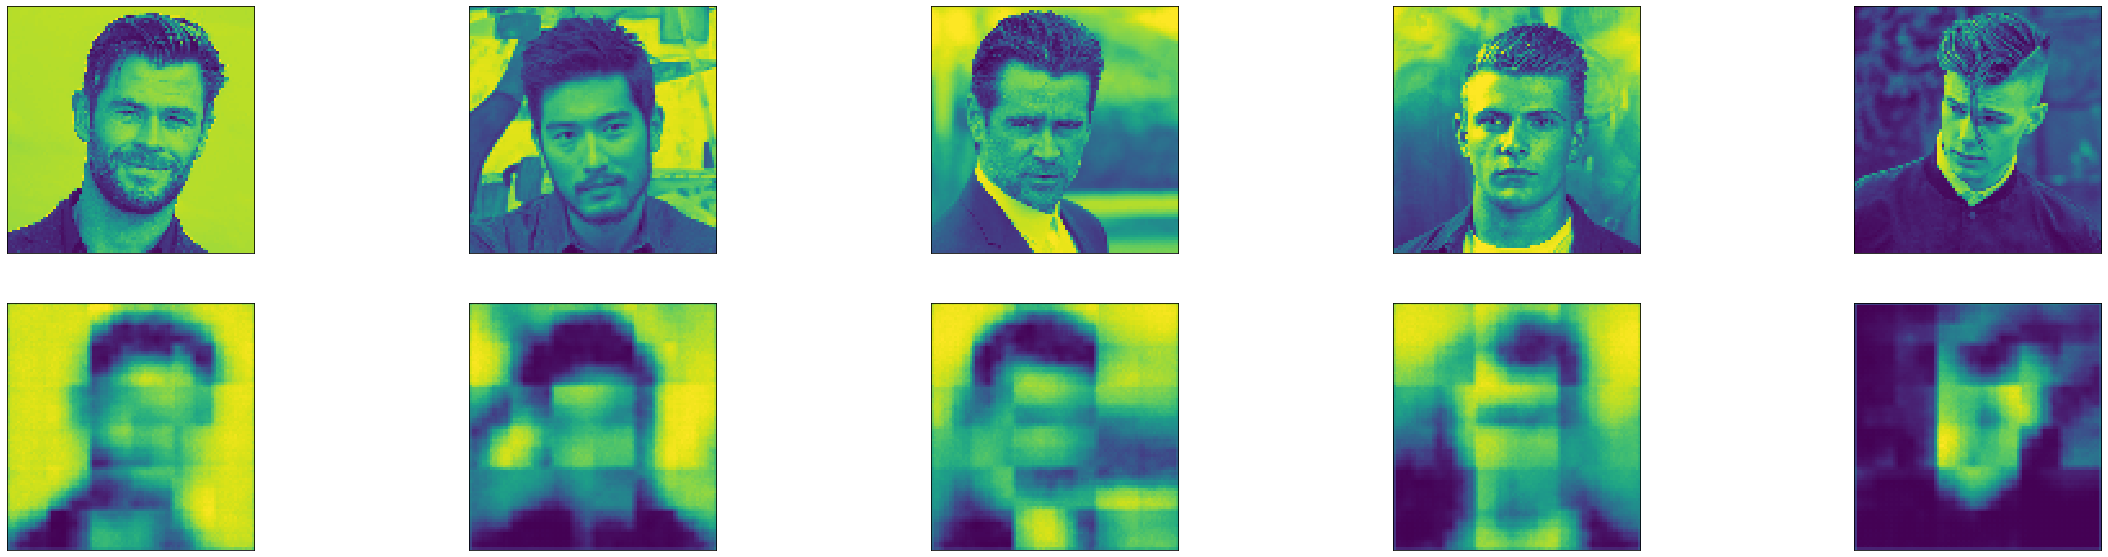

In [18]:

n = 5# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_imgs[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

###Pre-processing new data set

In [19]:
tn_path = "/content/drive/My Drive/downloads/test_normal.jpg"      #a normal image same as the first image in test_data
tnois_path = "/content/drive/My Drive/downloads/test_noise.jpg"    #a little bit of noise added using paint
tbb_path = "/content/drive/My Drive/downloads/test_bald_beard.jpg" #a bald image with a beard
tbn_path = "/content/drive/My Drive/downloads/test_bald.jpg"       #a bald image with no beard

n1 = (tn_path)
n2 = (tnois_path)
n3 = (tbb_path)
n4 = (tbn_path)

all_new = []

all_new.append(n1)
all_new.append(n2)
all_new.append(n3)
all_new.append(n4)

all_new
    


['/content/drive/My Drive/downloads/test_normal.jpg',
 '/content/drive/My Drive/downloads/test_noise.jpg',
 '/content/drive/My Drive/downloads/test_bald_beard.jpg',
 '/content/drive/My Drive/downloads/test_bald.jpg']

In [20]:
#import data in (96,96,1) image
new_data = []

#New data
for img in all_new:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    new_data.append(img)

new_data = np.array(new_data)
print(new_data.shape)

(4, 96, 96, 1)


### Dispaly of new testing data set

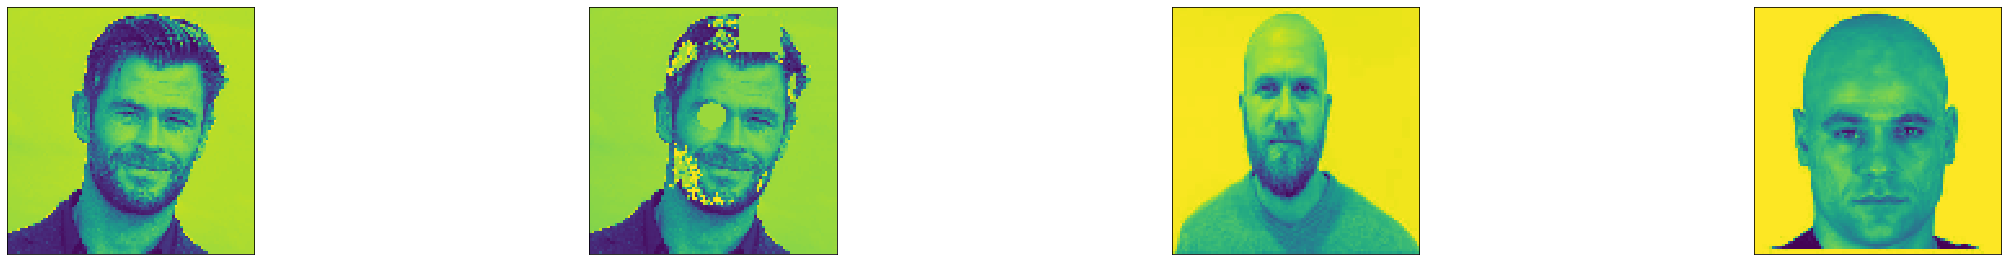

In [21]:
n = 4# how many digits we will display
plt.figure(figsize=(40,10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(new_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

###Autoencoder model prediction with new data set

In [0]:
new_input = autoencoder.predict(new_data, batch_size=1)



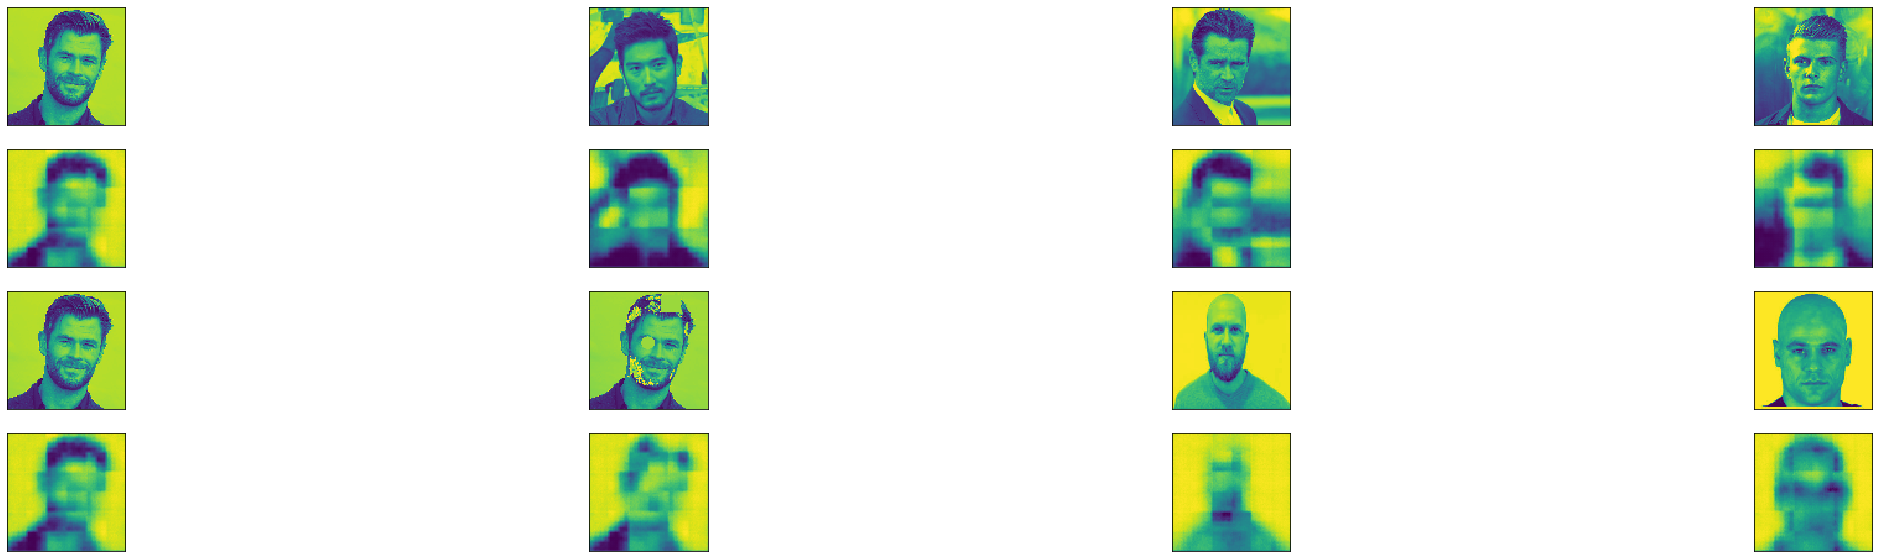

In [23]:
#Display

n = 4# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # dispay reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(recon_imgs[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new input
    ax = plt.subplot(4, n, i + 1 + n + n)
    plt.imshow(new_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new input prediction
    ax = plt.subplot(4, n, i + 1 + n + n + n)
    plt.imshow(new_input[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

###Building Variational Autoencoder

In [24]:
#Encoding  - mapping image inputs to latent distribution parameters

latent_dim = 2

input_img = Input(shape=(96,96,1))  # adapt this if using `channels_first` image data format

# Conv2d x 4 deep layers

x = Conv2D(32, (3, 3), activation='relu', strides=(2,2),padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', strides=(2,2),padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(64, (3, 3), activation='relu', strides=(2,2),padding='same')(x)
x = Dropout(0.20)(x)
x = Conv2D(128, (3, 3), activation='relu', strides=(2,2),padding='same')(x)
x = Dropout(0.20)(x)
encoded = Conv2D(128, (3, 3), activation='relu', strides=(2,2),padding='same')(x)

shape_before_flattening = K.int_shape(encoded)

encoded_to_z = Flatten()(encoded)



#Tow outputs, latent mean and (log) variance
z_mean = Dense(latent_dim)(encoded_to_z)
z_log_var = Dense(latent_dim)(encoded_to_z)

print(z_mean)
print(z_log_var)

Tensor("dense_1/BiasAdd:0", shape=(?, 2), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 2), dtype=float32)


In [25]:
# Using previous parameters to sample new similar points from the latent space

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(1,2), mean=0., stddev = 1.)
    return z_mean + K.exp(z_log_var / 2) * epsilon     #log var(sigma) is used and exponentiated in case the network may learn negative values for sigma.

z = Lambda(sampling)([z_mean, z_log_var])

print(z)
print(shape_before_flattening[1:])

Tensor("lambda_1/add:0", shape=(?, 2), dtype=float32)
(3, 3, 128)


In [26]:
# decoder takes the latent distribution sample as input shape (None, 2)
decoder_input = Input(K.int_shape(z)[1:])

#Decoding part - mapping sampled latent points back to reconstructed inputs


#Expand to 1152 total pixels
x = Dense(1152, activation='relu')(decoder_input)

#Reshape (6 * 6 * 256)
x = Reshape(shape_before_flattening[1:])(x)


#Decoder
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = UpSampling2D((2,2), interpolation='nearest')(x)
x = Conv2DTranspose(128, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = UpSampling2D((2,2), interpolation='nearest')(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = UpSampling2D((2,2), interpolation='nearest')(x)
x = Conv2DTranspose(64, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = UpSampling2D((2,2), interpolation='nearest')(x)
x = Conv2DTranspose(32, (2,2),padding='same', activation='relu',strides=(2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',strides =(2,2), padding='same')(x)
x = UpSampling2D((2,2), interpolation='nearest')(x)
x = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(z)


W0814 22:47:03.400573 139976343672704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



In [27]:
rows = train_data.shape[1]
cols = train_data.shape[2]

print(rows)
print(cols)

96
96


In [0]:
from keras.losses import binary_crossentropy

beta = 1.5 # 1 --> regular VAE
# reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss = binary_crossentropy(K.flatten(input_img),K.flatten(z_decoded))
reconstruction_loss *= rows * cols

kl_loss = -0.5 * K.sum(beta*(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

###Variational Autoencoder model

In [29]:
vae = Model(input_img, z_decoded)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 1)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 48, 48, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 24, 24, 64)   18496       conv2d_7[0][0]                   
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 24, 24, 64)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (

In [30]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1152)              3456      
_________________________________________________________________
reshape_2 (Reshape)          (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 6, 6, 128)         65664     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 12, 12, 128)       65664     
__________

In [31]:
vae.fit(train_data,
        shuffle=False,
        epochs=500,
        steps_per_epoch= int(len(train_data)/64),
        validation_steps= int(len(test_data)/64),
        validation_data=(test_data,None),verbose=0)

In [32]:
#VAE performance
train_eva = vae.evaluate(train_data,steps=int(len(train_data)/64), verbose=0)
print("Train loss = %f" % (train_eva))
test_eva = vae.evaluate(test_data,steps=int(len(test_data)/64),verbose=0)
print("Test loss = %f" % (test_eva))

Train loss = 5059.850167
Test loss = 5839.013672


In [0]:
vae.save('vae_h1')

###VAE prediction from test data

In [0]:
result_imgs1 = vae.predict(test_data, batch_size = int(len(test_data)/64), verbose=0)


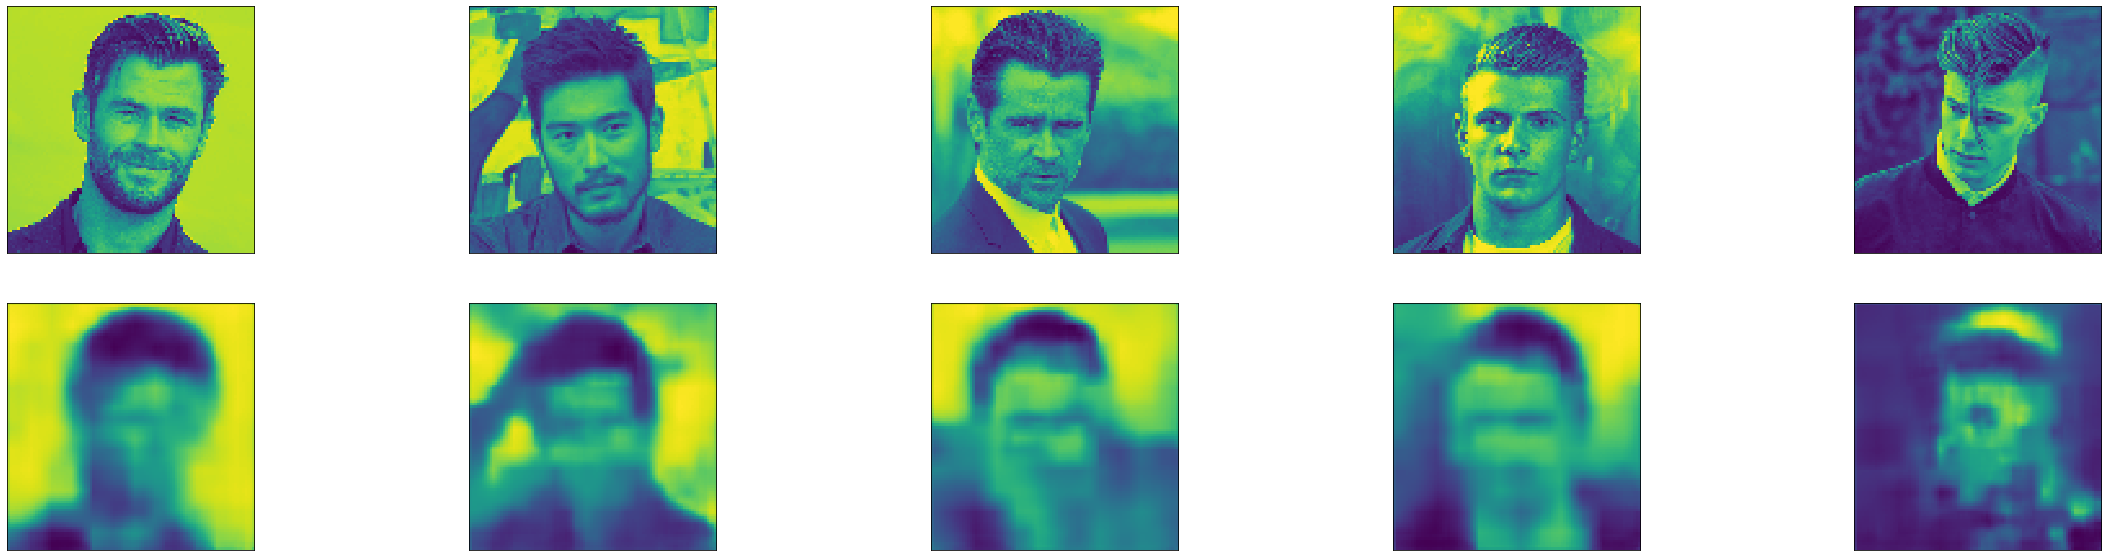

In [35]:


n = 5# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### VAE prediction from new test data

In [0]:
new_input1 = vae.predict(new_data, batch_size=1)


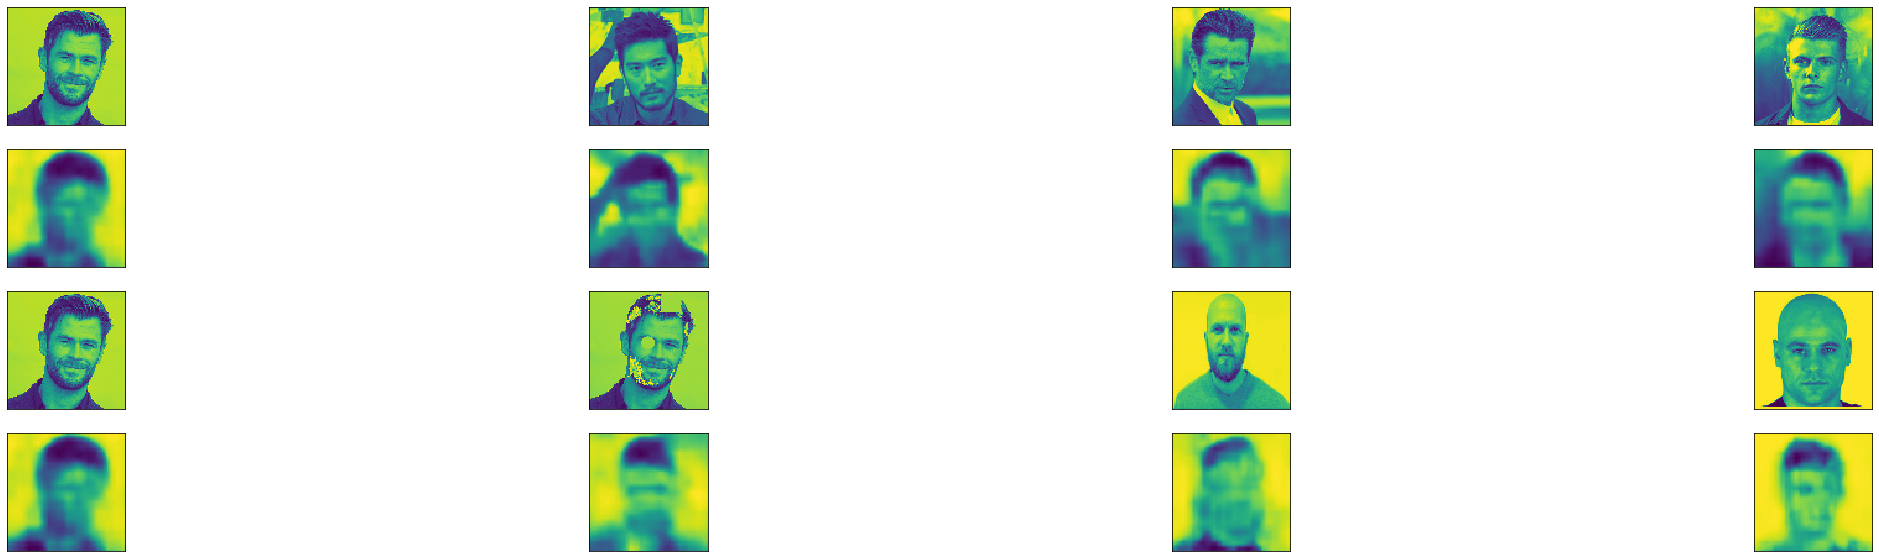

In [37]:
n = 4# how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # dispay reconstruction
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(result_imgs1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # new input
    ax = plt.subplot(4, n, i + 1 + n + n)
    plt.imshow(new_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
     # new input prediction
    ax = plt.subplot(4, n, i + 1 + n + n + n)
    plt.imshow(new_input1[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

###Loss plots

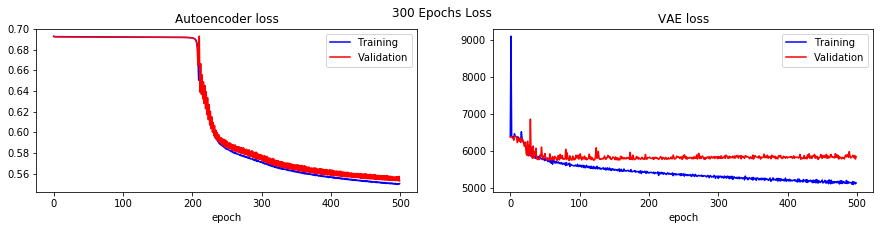

In [38]:
loss = [autoencoder.history.history['loss'],autoencoder.history.history['val_loss']]
loss1 = [vae.history.history['loss'],vae.history.history['val_loss']]
    
fig, axes = plt.subplots(1,2,figsize = (15,3))
fig.suptitle('500 Epochs Loss' )
for ax,val,name in zip(axes,(loss,loss1),['Autoencoder loss','VAE loss']):
        ax.plot(val[0], color='b', label="Training")
        ax.plot(val[1], color='r', label="Validation")
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(name)

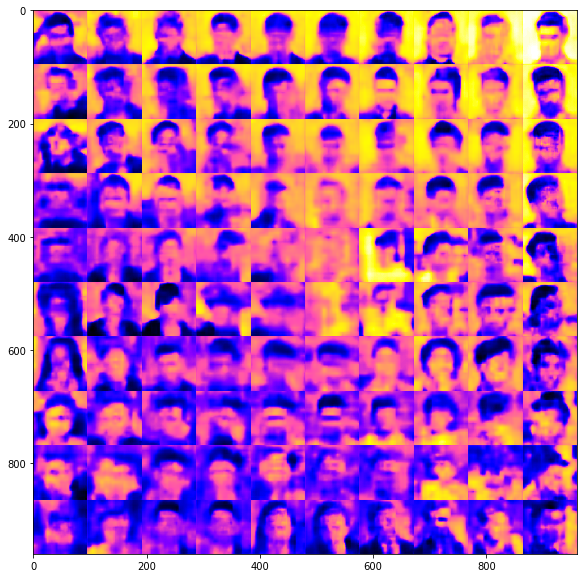

In [39]:
# use the decoder network to take a peak at what samples from the latent space look like as we change the latent variables.
# Display a 2D manifold of the images

n = 10  # figure with 10x10 images
img_size = 96
figure = np.zeros((img_size * n, img_size * n))

# Construct grid of latent variable values
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

# decode for each square in the grid
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, 64).reshape(64, 2)
        x_decoded = decoder.predict(z_sample, batch_size=64)
        digit = x_decoded[0].reshape(img_size, img_size)
        figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gnuplot2')
plt.show()  